In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
iris_dataset = load_iris()
iris_dataset.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df_iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
# Add target and class to DataFrame
df_iris['target'] = iris_dataset.target
df_iris['class'] = iris_dataset.target_names[iris_dataset.target]
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
y= df_iris['class']
x =df_iris.drop(columns=["target","class"])


In [ ]:
feature_names = x.columns
labels = y.unique()


In [ ]:

X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.2)

In [ ]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
test_pred_decision_tree = clf.predict(test_x)
trees =metrics.accuracy_score(test_lab, test_pred_decision_tree)
print("Accuracy:",trees)

Accuracy: 0.9333333333333333


Text(33.0, 0.5, 'True Label')

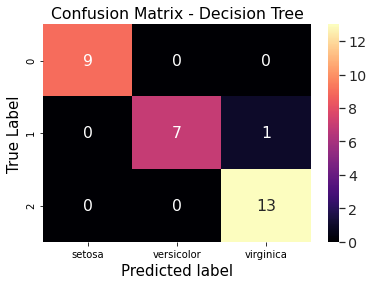

<Figure size 720x504 with 0 Axes>

In [ ]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted lable", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Lable", fontsize=15)

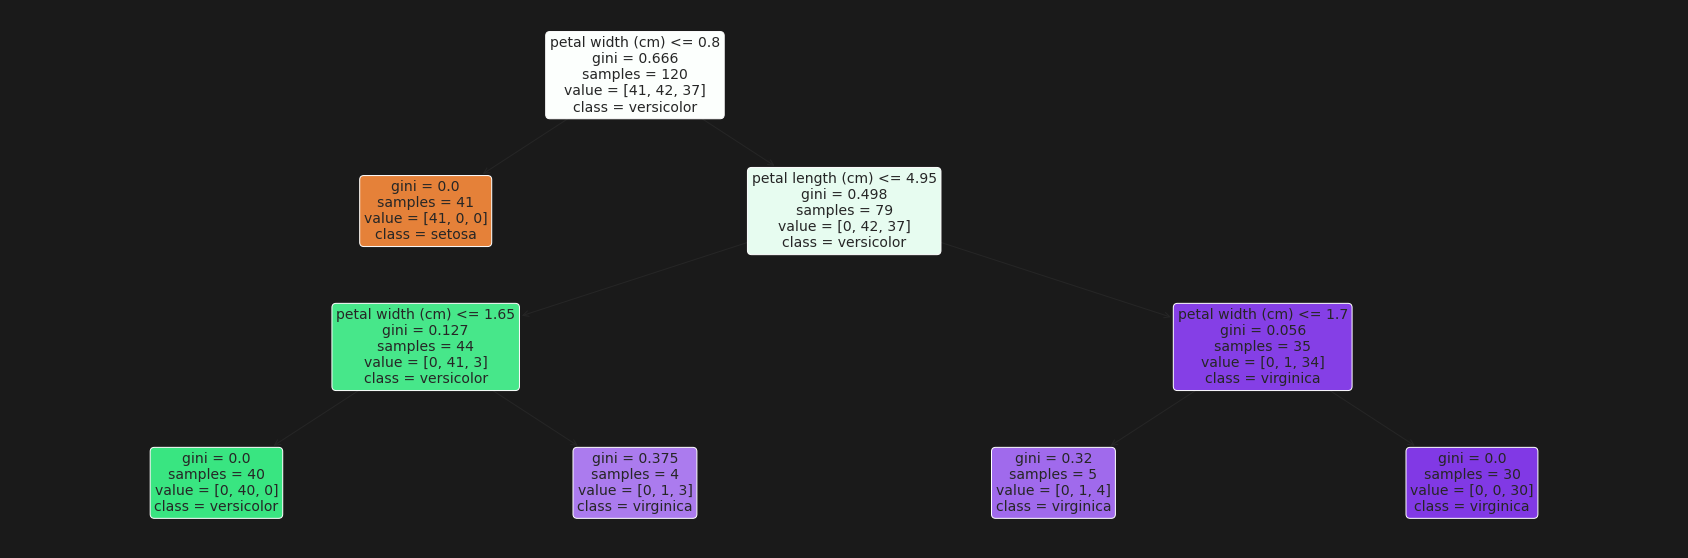

In [ ]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=iris_dataset.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.949635
petal length (cm)    0.050365
sepal length (cm)    0.000000
sepal width (cm)     0.000000
dtype: float64